# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

In [27]:
%pylab inline

from sklearn.datasets import load_digits
from sklearn.datasets import load_iris                  # Data used in BONUS exercise
from sklearn.preprocessing import StandardScaler # to normalize data
from sklearn.model_selection import train_test_split #to split in train and test set
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn.neighbors import KNeighborsClassifier

# load mnist dataset and split in train and test set.
digits = load_digits()
X = reshape(digits.images,(1797,64))                     # Input data (used in CVS)
X_train_mnist = reshape(digits.images[:1500],(1500,64))  # Input train set
X_test_mnist = reshape(digits.images[1500:],(297,64))    # Input test set
y = digits.target                                        # Output data (used in CVS)
y_train_mnist = digits.target[:1500]                     # Output train set
y_test_mnist = digits.target[1500:]                      # Output test set

# Scale Input Data
scaler = StandardScaler()                                
scaler.fit(X_train_mnist)
scaler.fit(X_test_mnist)
X_train_scaled = scaler.transform(X_train_mnist)
X_test_scaled = scaler.transform(X_test_mnist)

Populating the interactive namespace from numpy and matplotlib


## (1) Training LR and k-NN using default settings.

Here, nothing but the default settings for both LR and k-NN functions are used. The program outputs the averages of the 10-fold using the default input.

In [32]:
# Main function that calculates the 10-fold Cross Validation.
def CV_10Fold_defaultvalues(classifier,name):
    model = classifier.fit(X_train_scaled, y_train_mnist)
    print("Default value average of",name,"is:",(average(cross_val_score(model, X, y, cv=10))))

lr = LogisticRegression()
CV_10Fold_defaultvalues(lr,"LR")
knn = KNeighborsClassifier()
CV_10Fold_defaultvalues(knn,"k-NN")

Default value average of LR is: 0.931029834684
Default value average of k-NN is: 0.973948287255


## (2a) Optimizing k for k-NN

In this part, we try to find the optimal k for k-NN. A plot shows the success rates with varying k's, and the program also returns the optimal rate and its associated k value.

The highest rate 0.97778921138 is achieved with k = 3


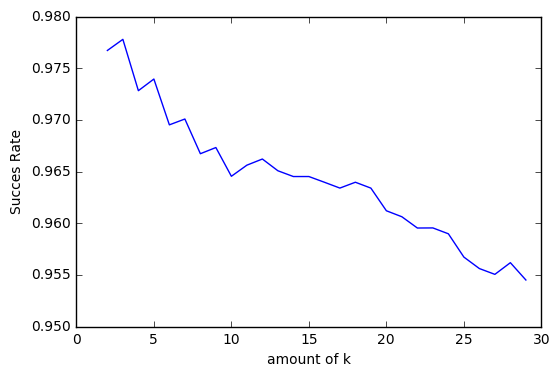

In [30]:
k_list = []
# Main function that calculates the 10-fold Cross Validation.
# Different from the previous one, this one appends the average value in a list for later use.
def CV_10Fold(classifier):
    model = classifier.fit(X_train_scaled, y_train_mnist)
    k_list.append(average(cross_val_score(model, X, y, cv=10)))

# A Loop that checks k's between 2 and 30
K = range(2,30)
for i in K:
    knn = KNeighborsClassifier(n_neighbors = i)
    CV_10Fold(knn)

# Make a plot for good visualization. The highest peak is the optimal average rate at that k
plt.ylabel("Succes Rate")
plt.xlabel("amount of k")
plt.plot(range(2,30),k_list)

#Pring the optimal average rate and its associated k value. (The +2 is because we start at k = 2, not k = 0.)
print("The highest rate",max(k_list),"is achieved with k =",2+k_list.index(max(k_list)))

## (2b) Optimizing regularization for LR